# PriceTrack: Unlocking Car Market Insights

PriceTrack is a data science project designed to predict the valuation of second-hand cars based on key input parameters. 
Leveraging Linear regression model, it provides data-driven insights to help buyers and sellers make informed decisions.

## Exploratory Data Analysis (EDA)

This step helps us understand the data we are dealing with and it's various aspects.

We will be performing univariate, bivariate and trivariate analysis along with plotting some graphs for better understanding.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [42]:
df = pd.read_csv("cleaned_data.csv")
df

,name,company,year,Price,kms_driven,fuel_type,Age,Annual_Km_Driven
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol,13,3461.538462
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,140160,Diesel,14,10011.436887
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol,6,4666.666667
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel,6,6000.000000
4,Ford Figo,Ford,2012,175000,41000,Diesel,8,5125.000000
...,...,...,...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol,9,5555.555556
812,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel,11,2727.272727
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol,11,12000.000000
814,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel,2,13500.000000


## 1) Year-wise Car Availability

In [43]:
year_wise_sales = df.groupby('year').size()
year_wise_sales

year
1995      2
2000      7
2001      5
2002      4
2003     13
2004     12
2005     13
2006     22
2007     19
2008     16
2009     54
2010     43
2011     59
2012     75
2013     94
2014     92
2015    111
2016     74
2017     53
2018     30
2019     18
dtype: int64

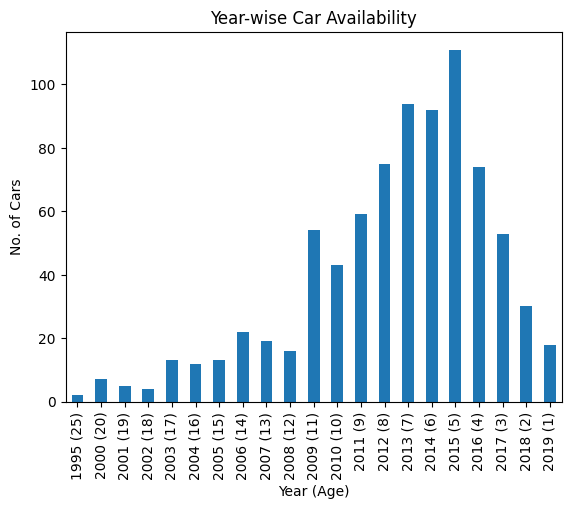

In [44]:
# Year-wise bar chart with frequency as its height
year_wise_sales.plot(kind='bar', xlabel='Year (Age)', ylabel='No. of Cars')

# Calculate age for each year
ages = year_wise_sales.index.max() - year_wise_sales.index + 1
tick_labels = [f"{year} ({age})" for year, age in zip(year_wise_sales.index, ages)]
ax = year_wise_sales.plot(kind='bar', xlabel='Year (Age)', ylabel='No. of Cars', title="Year-wise Car Availability")
ax.set_xticklabels(tick_labels)

# Show the plot
plt.show()

### 📊 Year-wise Car Availability  

- Cars from **2011-2016** are the most common in the resale market, peaking in **2015 (111 cars)**.  
- Older cars (before 2005) have low availability, indicating limited resale.  
- Newer models (2017 onward) show a decline, possibly due to ownership retention.  
- The **4-9 year old** range appears to be the resale sweet spot.  


## 2) Car Brand Distribution

In [45]:
company_wise_sales = df.groupby("company").size().sort_values()
company_wise_sales

company
Land            1
Jeep            1
Volvo           1
Jaguar          2
Hindustan       3
Force           4
Fiat            4
Mercedes        6
Mitsubishi      6
Nissan          6
Datsun          7
BMW             8
Mini            8
Audi           11
Skoda          13
Volkswagen     19
Ford           30
Renault        33
Chevrolet      34
Toyota         36
Honda          60
Tata           65
Mahindra       98
Hyundai       139
Maruti        221
dtype: int64

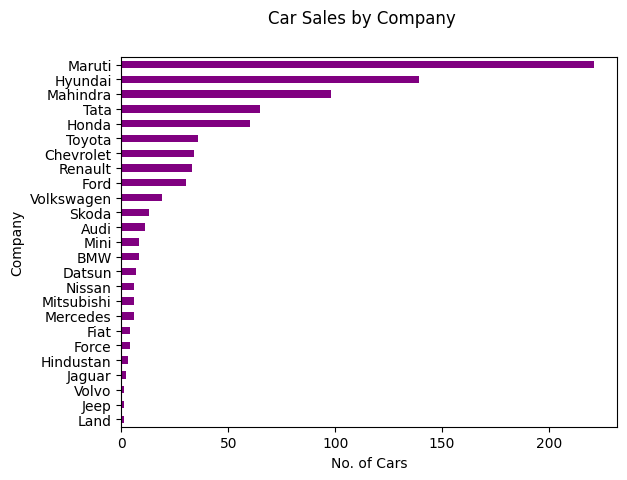

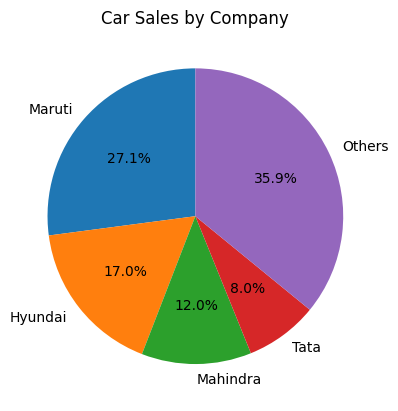

In [46]:
company_wise_sales.plot(
    kind="barh",
    xlabel="No. of Cars",
    ylabel="Company",
    title="Car Sales by Company",
    color="purple",
    subplots=True,
)
plt.show()


# Pie chart for company-wise sales
number_of_companies = 4
company_wise_sales_pie = df.groupby("company").size().sort_values(ascending=False).head(number_of_companies).copy()
company_wise_sales_pie.loc['Others'] = df.groupby("company").size().sort_values(ascending=False).tail(-number_of_companies).sum()
company_wise_sales_pie.plot(kind='pie', autopct='%1.1f%%', startangle=90, title="Car Sales by Company")
plt.show()


### 📊 Car Brand Distribution in the Resale Market

##### **Maruti, Hyundai and Mahindra** combined hold around **56%** of the total resale market

- **Maruti (219 - 26.9%) and Hyundai (139 - 17.1%)** dominate the resale market, reflecting their strong presence and popularity in India.  
- Mid-range brands like **Toyota (36), Chevrolet (34), and Renault (33)** have moderate presence. 
- Luxury brands such as **BMW (8), Audi (11), and Mercedes (6)** have limited resale availability.
- Niche brands like **Jaguar (2), Volvo (1), and Jeep (1)** are the least common in the second-hand market.


The data suggests that **mass-market brands** have a higher resale volume, while **luxury and niche brands** are less frequently resold. 🚗📈  


## 3) Relation between Price and Kilometers Driven

In [47]:
x_col = df["kms_driven"]
y_col = df["Price"]

print(df[["kms_driven", "Price"]])

     kms_driven   Price
0         45000   80000
1        140160  425000
2         28000  325000
3         36000  575000
4         41000  175000
..          ...     ...
811       50000  270000
812       30000  110000
813      132000  300000
814       27000  260000
815       40000  390000

[816 rows x 2 columns]


In [48]:
def plot_scatter_chart(df, x_col, y_col, color = [], title = ""):
    x = df[x_col]
    y = df[y_col]
    plt.scatter(x,y,c=color,s=6)
    plt.title(title)
    plt.gca().ticklabel_format(axis='y', style='plain', useOffset=True, useLocale=True)
    col1_marker = mlines.Line2D([], [], color="orange", marker='o', linestyle='None', markersize=6, label="Petrol")
    col2_marker = mlines.Line2D([], [], color="green", marker='o', linestyle='None', markersize=6, label="Diesel")
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.capitalize())
    plt.legend(handles=[col1_marker, col2_marker])
    plt.show()

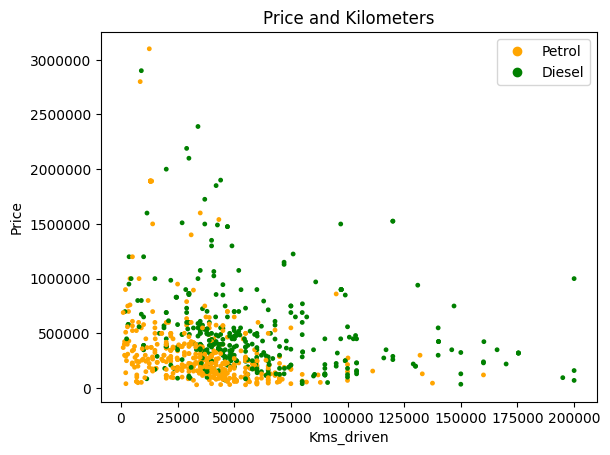

In [49]:
color = df["fuel_type"].map(lambda type: "orange" if type=="Petrol" else "green")
plot_scatter_chart(df, "kms_driven", "Price", color, "Price and Kilometers")

### 📊 Relation between Price and Kilometers Driven

- There is a **negative correlation** between the number of kilometers driven and the car price.
- **Cars with fewer kilometers** generally command a **higher price**, as lower mileage typically indicates less wear and tear.
- **Fuel type** (Petrol or Diesel) influences pricing slightly — Diesel vehicles may retain value better at higher mileage.
- **After around 100,000 km**, prices tend to drop significantly regardless of fuel type.
- The scatter plot shows a wide spread at lower kilometer ranges, indicating that other factors (brand, model, condition) also affect pricing.

## 4) Relation between Price and Age

In [50]:
x_col = df["Age"]
y_col = df["Price"]

print(df[["Age", "Price"]])

     Age   Price
0     13   80000
1     14  425000
2      6  325000
3      6  575000
4      8  175000
..   ...     ...
811    9  270000
812   11  110000
813   11  300000
814    2  260000
815    7  390000

[816 rows x 2 columns]


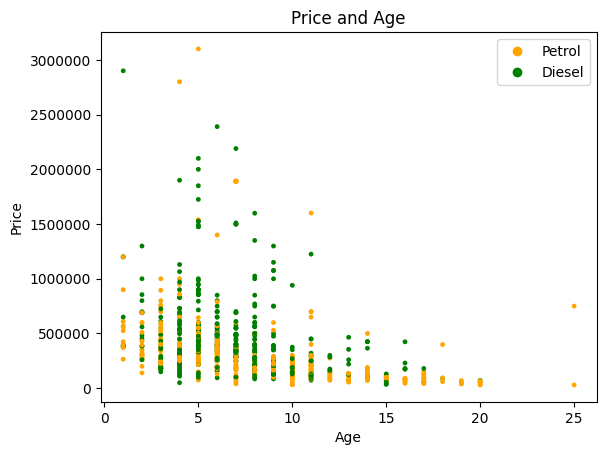

In [51]:
color = df["fuel_type"].map(lambda type: "orange" if type=="Petrol" else "green")
plot_scatter_chart(df, "Age", "Price", color, "Price and Age")

### 📊 Relation between Price and Age

- There is a **strong negative correlation** between a car's age and its price.
- **Newer cars** (0–5 years) experience a **steep depreciation**, losing value quickly.
- After about **8–10 years**, the depreciation rate slows, and prices stabilize at lower values.
- Both Petrol and Diesel cars follow this general trend.
- The chart suggests that buying slightly older cars (3–5 years) may offer better value compared to brand-new cars, given the steep initial depreciation.

## 5) Fuel Types

In [52]:
print(df["fuel_type"].value_counts())
fuelTypeDistribution = df["fuel_type"].value_counts(normalize=True).mul(100).round(1)
fuelTypeDistribution.astype(str) + '%'

fuel_type
Petrol    430
Diesel    386
Name: count, dtype: int64


fuel_type
Petrol    52.7%
Diesel    47.3%
Name: proportion, dtype: object

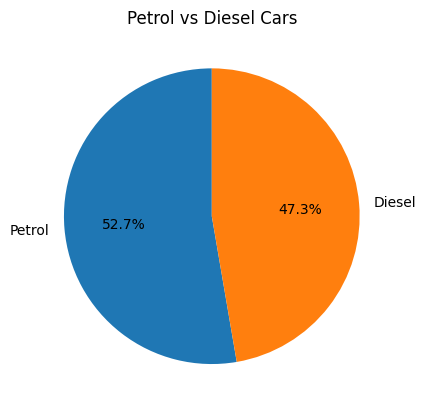

In [53]:
fuelTypeDistribution.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Petrol vs Diesel Cars")
plt.ylabel("")
plt.show()

### 📊 Petrol vs Diesel Cars

- The chart is **evenly split**, suggesting a balanced market between Petrol and Diesel cars.
- **Market trends** may influence this distribution — for example, in some regions, Diesel cars are more common for high-mileage vehicles, while Petrol cars are preferred for city driving.
- This insight can help potential buyers or sellers understand the **fuel-type preference** in the market.